In [1]:
import numpy as np  # Para operaciones numéricas y manipulación de arrays
import pandas as pd  # Para manipulación de datos y creación de DataFrames
from astropy.io import fits  # Para leer archivos FITS
from astropy.io import fits
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
import tensorflow_addons as tfa
import matplotlib.pyplot as plt


2023-05-07 20:16:08.072111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 20:16:08.185695: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-07 20:16:08.667932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hadoop/lib/native:
2023-05-07 20:16:08.667984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot

In [2]:
#label
output_data = fits.open('/home/21953404Victor/SDC3/SDC3GIT/catalogos/catalogo completo 1/fit/LABEL_COMPLETO_V1.fit')[0].data
#imagenes
path_datos = "/home/21953404Victor/SDC3/SDC3GIT/data_actualizada/"
path = path_datos + "ZW3.msw_image.fits"
input_data = fits.open(path)[0].data

In [3]:
# Carga del modelo
with tf.keras.utils.CustomObjectScope({'InstanceNormalization': tfa.layers.InstanceNormalization}):
    model = load_model("cnn-cpu-completa-3.h5", compile=False)

2023-05-07 20:16:09.671981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-07 20:16:09.679114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hadoop/lib/native:
2023-05-07 20:16:09.679134: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-07 20:16:09.679608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with 

In [4]:
input_data = np.array(input_data)
input_data = input_data.reshape((input_data.shape[0], input_data.shape[1], input_data.shape[2], 1))
input_data = input_data.astype("float32") / 255.0

Iteración 1: Evaluando imágenes 0-9
1/1 [==============================] - 3s 3s/step
Iteración 2: Evaluando imágenes 10-19
1/1 [==============================] - 3s 3s/step
Iteración 3: Evaluando imágenes 20-29
1/1 [==============================] - 3s 3s/step
Iteración 4: Evaluando imágenes 30-39
1/1 [==============================] - 3s 3s/step
Iteración 5: Evaluando imágenes 40-49
1/1 [==============================] - 3s 3s/step
Iteración 6: Evaluando imágenes 50-59
1/1 [==============================] - 3s 3s/step
Iteración 7: Evaluando imágenes 60-69
1/1 [==============================] - 3s 3s/step
Iteración 8: Evaluando imágenes 70-79
1/1 [==============================] - 3s 3s/step
Iteración 9: Evaluando imágenes 80-89
1/1 [==============================] - 3s 3s/step
Iteración 10: Evaluando imágenes 90-99
1/1 [==============================] - 3s 3s/step
Iteración 11: Evaluando imágenes 100-109
1/1 [==============================] - 3s 3s/step
Iteración 12: Evaluando imágen

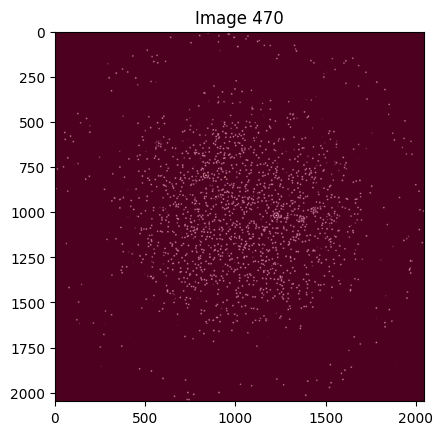

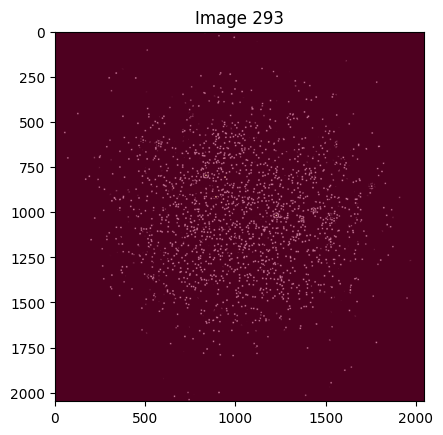

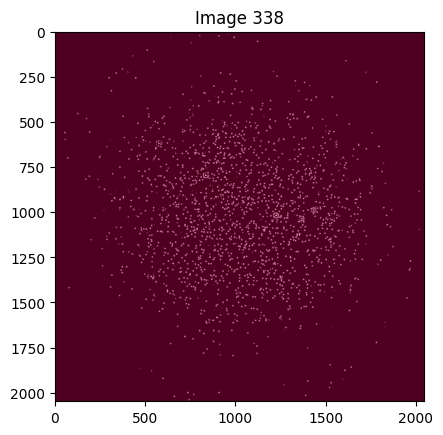

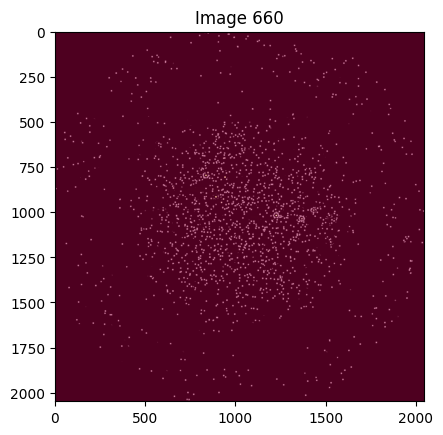

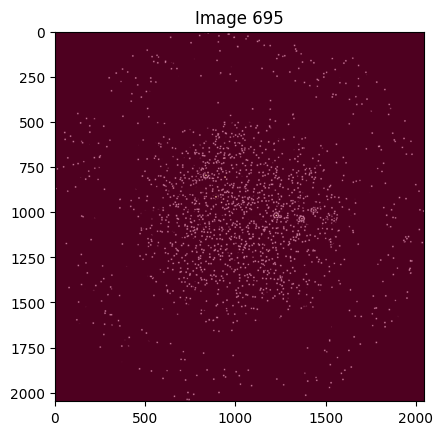

In [5]:
# Predecir con el modelo en grupos de 10 imágenes para evitar problemas de memoria
batch_size = 10
num_batches = int(np.ceil(len(input_data) / batch_size))
predictions = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(input_data))
    print(f"Iteración {i + 1}: Evaluando imágenes {start_idx}-{end_idx - 1}")
    batch_predictions = model.predict(input_data[start_idx:end_idx])
    batch_predictions = np.round(batch_predictions).astype(int)
    predictions.extend(batch_predictions)

predictions = np.array(predictions)

# Graficar los resultados de 5 imágenes al azar
num_images_to_show = 5
for i in range(num_images_to_show):
    i= np.random.randint(0, len(input_data))
    plt.figure()
    plt.imshow(predictions[i], cmap="gray")  # Predicción
    plt.imshow(input_data[i], cmap="Spectral", alpha=0.5)  # Imagen
    plt.title(f"Image {i}")
    plt.show()

In [6]:
del input_data